In [3]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
# sys.setrecursionlimit(10**6)


# Sorting Algorithms

In [11]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n-1,0,-1):
        for j in range(i):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

#------------------------------------------------------#

def selection_sort(arr):
    n = len(arr)
    for i in range(n-1):
        min_val = arr[i]
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < min_val:
                min_val = arr[j]
                
                min_idx = j

        if min_idx != i:
            arr[min_idx], arr[i] = arr[i], arr[min_idx]
    return arr

#------------------------------------------------------#

def merge_sort(arr):
    _merge_sort(arr, 0, len(arr))

def _merge_sort(arr, l, r):
    if l + 1 == r: return
    m = (l + r) // 2
    _merge_sort(arr, l, m)
    _merge_sort(arr, m, r)
    _merge(arr, l, m, r)

    return arr

def _merge(arr, l, m, r):
    tmp = arr[l:r]
    i, j, k = 0, m-l, l
    while i < (m-l) and j < (r-l):
        if tmp[i] < tmp[j]:
            arr[k] = tmp[i]
            i += 1; k += 1
        else:
            arr[k] = tmp[j]
            j += 1; k += 1
    while i < m-l:
        arr[k] = tmp[i]
        i += 1; k += 1
    while j < r-l:
        arr[k] = tmp[j]
        j += 1; k += 1

#------------------------------------------------------#

def insertion_sort(arr):
    n = len(arr)

    for i in range(1, n):
        for j in range(i, 0, -1):
            if arr[j-1] <= arr[j]:
                break
            arr[j-1], arr[j] = arr[j], arr[j-1]
    return arr

#------------------------------------------------------#

def quicksort(arr, l=0, r=None):
    if r is None:
        r = len(arr)
    if l + 1 >= r:
        return

    p = random_partition(arr, l, r)  # 항상 맨 오른쪽 pivot을 선택하니 recursion error 발생해서 랜덤 피벗 사용
    quicksort(arr, l, p)
    quicksort(arr, p + 1, r)

def random_partition(arr, l, r):
    pivot = random.randint(l, r-1) # 랜덤 pivot
    arr[pivot], arr[r-1] = arr[r-1], arr[pivot]  # pivot 마지막으로 이동시킴
    return partition(arr, l, r)

def partition(arr, l, r):
    p = arr[r-1]
    i = l
    for j in range(l, r):
        if arr[j] <= p:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    return i - 1


#------------------------------------------------------#

def heap_sort(arr):
    n = len(arr)
    buildheap(arr, n)

    for i in range(n-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        sift_down(0, arr, i)
    return arr

def sift_down(i, arr, n):
    c = 2*i + 1
    while c < n:
        if c + 1 < n and arr[c] < arr[c+1]:
            c = c + 1
        if arr[c] < arr[i]:
            break
        arr[c], arr[i] = arr[i], arr[c]

        i = c
        c = 2*i + 1

def buildheap(arr, n):
    for i in range(n//2 - 1, -1, -1):
        sift_down(i, arr, n)


# Benchmark!

In [52]:
def is_ordered(arr):
    for i in range(len(arr)-1):
        if arr[i] > arr[i+1]:
            return False

    return True

def benchmark(arr, algorithm):
    arr_copy = arr.copy()

    s = time.time() # 시작

    if algorithm == quicksort:
        algorithm(arr_copy, 0, len(arr_copy))
    else:
        algorithm(arr_copy)

    e = time.time() # 끝

    assert(is_ordered(arr_copy))

    return e - s

sizes = [5, 10, 20, 50, 100, 250, 500, 1000, 2000, 4000, 8000]
algorithms = [bubble_sort, selection_sort, merge_sort, insertion_sort, quicksort, heap_sort]

# benchmark with random, sorted, reversed arrays
times_random = {}
times_sorted = {}
times_reversed= {}

for n in sizes:

    times_random[n] = []
    times_sorted[n] = []
    times_reversed[n] = []

    random_arr = [random.randrange(10000) for _ in range(n)]
    sorted_arr = sorted(random_arr)
    reversed_arr = sorted_arr[::-1]

    for algorithm in algorithms:
    
        duration1 = benchmark(random_arr, algorithm)
        duration2 = benchmark(sorted_arr, algorithm)
        duration3 = benchmark(reversed_arr, algorithm)
        
        times_random[n].append(duration1)
        times_sorted[n].append(duration2)
        times_reversed[n].append(duration3)

# Plotting

## 일반 그래프

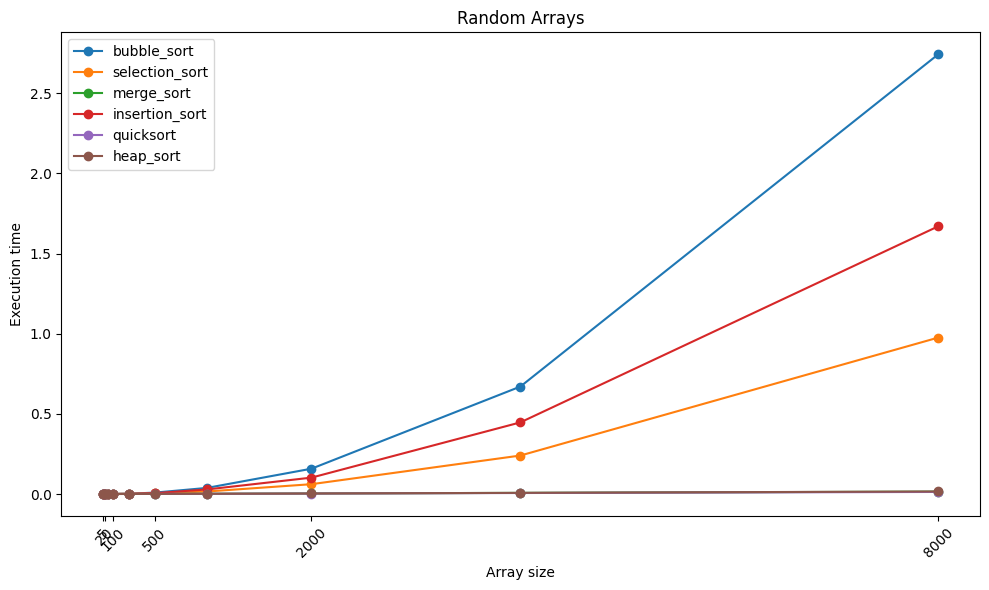

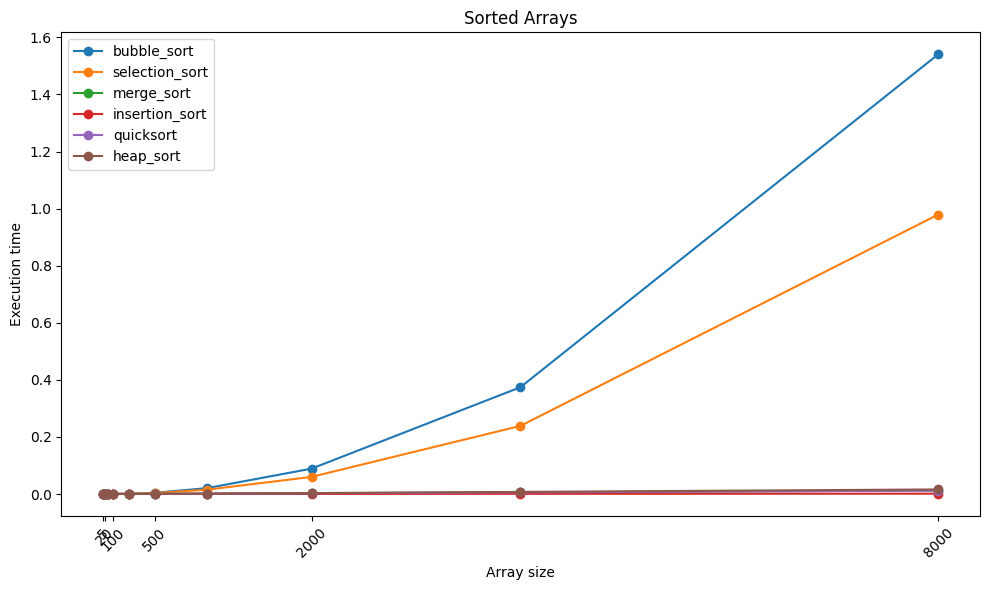

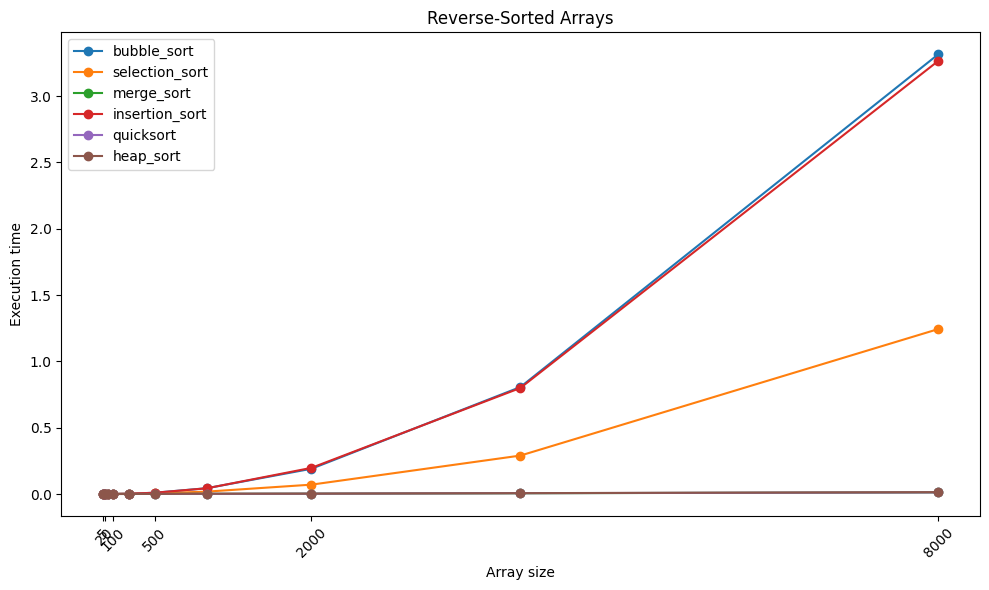

In [53]:
def plot_times_normal_scale(times, title):
    plt.figure(figsize=(10, 6))
    for i, algorithm in enumerate(algorithms):
        time_values = [times[n][i] for n in sizes]
        plt.plot(sizes, time_values, "-o", label=algorithm.__name__)

    plt.xticks(sizes[::2], labels=sizes[::2], rotation=45) 
    plt.xlabel("Array size")
    plt.ylabel("Execution time")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 랜덤
plot_times_normal_scale(times_random, "Random Arrays")

# 오름차순
plot_times_normal_scale(times_sorted, "Sorted Arrays")

# 내림차순
plot_times_normal_scale(times_reversed, "Reverse-Sorted Arrays")


## 로그 스케일 그래프

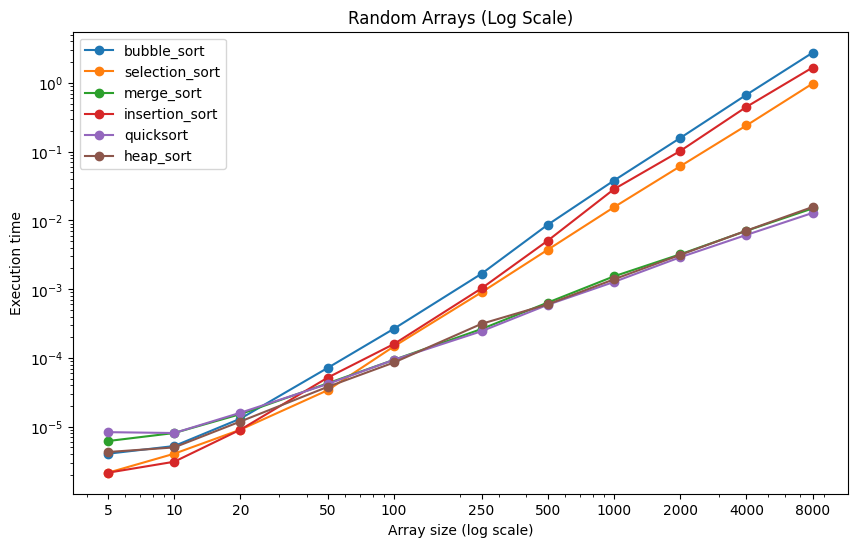

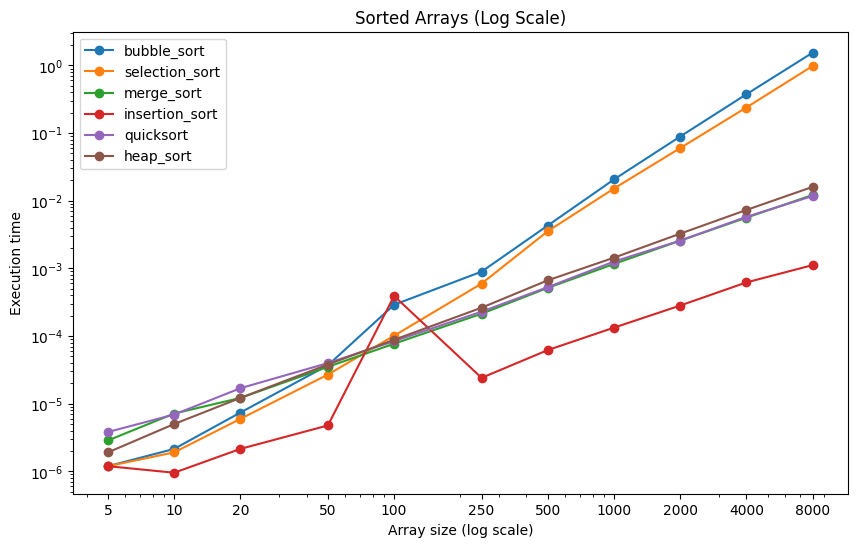

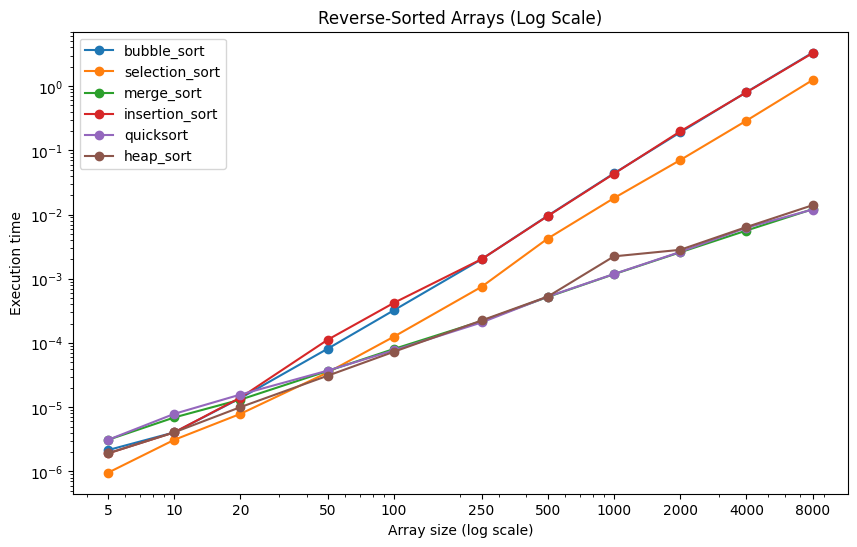

In [55]:
def plot_times_log_scale(times, title):
    plt.figure(figsize=(10, 6))
    for i, algorithm in enumerate(algorithms):
        time_values = [times[n][i] for n in sizes]
        plt.plot(sizes, time_values, "-o", label=algorithm.__name__)

    plt.xscale("log") 
    plt.yscale("log") 
    plt.xticks(sizes, labels=sizes) 
    # log_sizes = np.log10(sizes)
    # plt.xticks(sizes, labels=[f'{x:.1f}' for x in log_sizes])  
    plt.xlabel("Array size (log scale)")
    plt.ylabel("Execution time")
    plt.title(title)
    plt.legend()
    plt.show()

# 랜덤
plot_times_log_scale(times_random, "Random Arrays (Log Scale)")

# 오름차순
plot_times_log_scale(times_sorted, "Sorted Arrays (Log Scale)")

# 내림차순
plot_times_log_scale(times_reversed, "Reverse-Sorted Arrays (Log Scale)")
